# GITHUB

https://github.com/Vladimirjon/MetodosNumericos_PasquelJohann

# CONJUNTO DE EJERCICIOS 

## PREGUNTA 1

### Error y redondeo

Dados los puntos $(x_0,y_0)$ y $(x_1,y_1)$ , existen dos fórmulas para encontrar la intersección $x$ de la línea:

Método A
$$x = \frac{x_0 \cdot y_1 - x_1 \cdot y_0}{y_1 - y_0}$$

Método B

$$x = x = x_0 - \frac{(x_1 - x_0) \cdot y_0}{y_1 - y_0}$$

Usando los datos $(x_0,y_0) = (1.31,3.24)$ y $(x_1,y_1) = (1.93,4.76)$

El valor real de la  intersección $x$ (asumiendo redondeo a 6 cifras significativas):

Utilizando el Método A

Reemplazamos

$x = \frac{1.31 \cdot 4.76 - 1.93 \cdot 3.24}{4.76 - 3.24}$

$x = \frac{6.2356 - 6.2532}{1.52}$

$x = \frac{-0.0176}{1.52}$

$x = -0.01157894737$

$$x = -0.011579$$

Usando aritmética de computador con redondeo a 3 cifras significativas resuelva para ambos métodos.

#### Usando el método A:

$x = -0.019$

El error relativo (redondeado a 3 cifras significativas) del método B es:

$ϵ = 0.701$

#### Usando el método B:

$x = -0.010$

El error relativo (redondeado a 3 cifras significativas) del método B es:

$ϵ = 0.136$

De esta manera se puede concluir que el **método B** es mejor que el método A

## PREGUNTA 2

### Serie de Maclaurin para la función arcotangente

$$x - \frac{1}{3}x^3 + \frac{1}{5}x^5$$

Asumiendo que $\pi = 3.141569$ se calcula el errpr relativo para las siguientes aproximaciones de $\pi$ mediante el polinomio

#### $4(arctan(\frac{1}{2})+arctan(\frac{1}{3}))$

$4 ((\frac{1}{2} - \frac{(\frac{1}{2})^3}{3}+ \frac{(\frac{1}{2})^5}{5}) + (\frac{1}{3} - \frac{(\frac{1}{3})^3}{3}+ \frac{(\frac{1}{3})^5}{5}))$

$4(arctan(\frac{1}{2})+arctan(\frac{1}{3}))= 3.145$

$ϵ = 0.0012$

$ϵ < 10 ^ n$ , de esta manera $n = -2$

#### $16arctan(\frac{1}{5})-4arctan(\frac{1}{239})$

$16 (\frac{1}{5} - \frac{(\frac{1}{5})^3}{3}+ \frac{(\frac{1}{5})^5}{5}) - 4 (\frac{1}{239} - \frac{(\frac{1}{239})^3}{3}+ \frac{(\frac{1}{239})^5}{5})$

$16arctan(\frac{1}{5})-4arctan(\frac{1}{239}) = 3.141$

$ϵ = 0.000009877$

$ϵ < 10 ^ n$ , de esta manera $n = -5$

## PREGUNTA 3

### Método de Newton para encontrar raíces se basa en la siguiente ecuación:

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

Para la ecuación:

$$x^3 +x = 1+3x^2$$

In [9]:
x_sol = 2.769

In [17]:
import numpy as np

def newton_method(func, func_prime, x0, tol=1e-6, max_iter=100):
    x_n = x0
    for i in range(max_iter):
        f_xn = func(x_n)
        f_prime_xn = func_prime(x_n)
        
        if abs(f_prime_xn) < 1e-12:  
            return "Error [división para 0]"
        
        x_n1 = x_n - f_xn / f_prime_xn
        
        if abs(x_n1 - x_n) < tol:  
            return f"x_sol = {x_n1:.6f}"
        
        x_n = x_n1
    
    return "Error [diverge u oscila]"


def f(x):
    return x**3 + x - (1 + 3*x**2)

def f_prime(x):
    return 3*x**2 + 1 - 6*x

En los puntos:

$x_0 = 3$

In [19]:
x0 = 3

resultado = newton_method(f, f_prime, x0)
print(f"x0 = {x0} -> Resultado: {resultado}")

x0 = 3 -> Resultado: x_sol = 2.769292


$x_0 = 1$

In [20]:
x0 = 1

resultado = newton_method(f, f_prime, x0)
print(f"x0 = {x0} -> Resultado: {resultado}")

x0 = 1 -> Resultado: Error [diverge u oscila]


$x_0 = 0$

In [21]:
x0 = 0

resultado = newton_method(f, f_prime, x0)
print(f"x0 = {x0} -> Resultado: {resultado}")

x0 = 0 -> Resultado: Error [diverge u oscila]


$x_0 = 1 + \frac{\sqrt{6}}{3}$

In [24]:
import math 

x0 = 1 + math.sqrt(6)/3

resultado = newton_method(f, f_prime, x0)
print(f"x0 = {x0} -> Resultado: {resultado}")

x0 = 1.8164965809277258 -> Resultado: Error [división para 0]


## PREGUNTA 4

### Método de la Secante 

En el método de la Secante se basa en la siguiente fórmula:
$$x_n = x_{n-1} - \frac{y_{n-1} (x_{n-1} - x_{n-2})}{y_{n-1} -y_{n-2}} $$

En base a esta fórmula, se ha generado el siguiente código. 

In [2]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):    
    x_prev = x0
    x_curr = x1
    iter_count = 0

    while abs(f(x_curr)) > tol and iter_count < max_iter:
        # Calculate the next approximation using the secant method formula
        x_next = x_curr - f(x_curr) * (x_curr - x_prev) / (f(x_curr) - f(x_prev))

        # Update variables for the next iteration
        x_prev = x_curr
        x_curr = x_next
        iter_count += 1

    return x_curr, iter_count

Código corregido y optimizado:

In [4]:
def optmizado_secante (f, x0: float, x1: float, tol: float = 1e-6, max_iter: int = 100) -> tuple[float, int]:
    # Inicializamos las variables
    x_anterior = x0
    x_actual = x1
    f_anterior = f(x_anterior)  # Calculamos una vez f(x0)
    f_actual = f(x_actual)  # Calculamos una vez f(x1)
    iter_count = 0

    while abs(f_actual) > tol and iter_count < max_iter:

        # Calculamos la siguiente aproximación utilizando los valores almacenados
        x_siguiente = x_actual - f_actual * (x_actual - x_anterior) / (f_actual - f_anterior)

        # Actualizamos las variables
        x_anterior, f_anterior = x_actual, f_actual
        x_actual = x_siguiente
        f_actual = f(x_actual)  # Calculamos f(x_siguiente) para la siguiente iteración
        iter_count += 1

    return x_actual, iter_count

In [5]:
i = 0


def func(x):
    global i
    i += 1
    y = x**3 - 3 * x**2 + x - 1
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y


optmizado_secante(func, x0=2, x1=3)

Llamada i=1	 x=2.00000	 y=-3.00
Llamada i=2	 x=3.00000	 y=2.00
Llamada i=3	 x=2.60000	 y=-1.10
Llamada i=4	 x=2.74227	 y=-0.20
Llamada i=5	 x=2.77296	 y=0.03
Llamada i=6	 x=2.76922	 y=-0.00
Llamada i=7	 x=2.76929	 y=-0.00
Llamada i=8	 x=2.76929	 y=0.00


(2.7692923542484045, 6)

In [6]:
i = 0
import math


def func(x):
    global i
    i += 1
    y = math.sin(x) + 0.5
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y


optmizado_secante(func, x0=2, x1=3)

Llamada i=1	 x=2.00000	 y=1.41
Llamada i=2	 x=3.00000	 y=0.64
Llamada i=3	 x=3.83460	 y=-0.14
Llamada i=4	 x=3.68602	 y=-0.02
Llamada i=5	 x=3.66399	 y=0.00
Llamada i=6	 x=3.66520	 y=-0.00
Llamada i=7	 x=3.66519	 y=-0.00


(3.66519143172732, 5)

## PREGUNTA 5

### ¿A cuál solución converge el método de la Bisección en los siguientes intervalos?

La función $sin(x)$ tienen infinitas soluciones {$...,-2 \pi,-\pi,0,\pi,2\pi,...$}

![Función sin(x)](./img/Pregunta5.jpeg)

In [66]:
import numpy as np

def biseccion(func, a, b, tol=1e-6, max_iter=100):
    try:

        if func(a) * func(b) >= 0:
            raise ValueError("f(a) y f(b) no tienen signos opuestos.")
        
        iteraciones = 0
        while (b - a) / 2 > tol and iteraciones < max_iter:
            c = (a + b) / 2
            if func(c) == 0:  
                return c
            elif func(a) * func(c) < 0:
                b = c
            else:
                a = c
            iteraciones += 1

        return (a + b) / 2  

    except ValueError as e:
        return f"No se puede aplicar el método de bisección: {e}"

def sinx(x):
    return np.sin(x)

In [61]:
def resultado_biseccion(func, a, b, tol=1e-6, max_iter=100):

    resultado = biseccion(func, a, b, tol, max_iter)
    if isinstance(resultado, str):
        print(resultado)  
    else:
        print(f"La raíz aproximada en el intervalo [{a}, {b}] es: {resultado:.6f}")


$a = 3,b = 5$

In [60]:
a = 3
b = 5

resultado_biseccion(sinx,a,b)

La raíz aproximada en el intervalo [3, 5] es: 3.141593


**Converge en $\pi$**

$a = -4,b = 5$

In [59]:
a = -4
b = 5

resultado_biseccion(sinx,a,b)

La raíz aproximada en el intervalo [-4, 5] es: 3.141592


**Converge en $\pi$**

$a = -5,b = 4$

In [58]:
a = -5
b = 4

resultado_biseccion(sinx,a,b)

La raíz aproximada en el intervalo [-5, 4] es: -3.141592


**Converge en $-\pi$**

$a = -1,b = 2$

In [57]:
a = -1
b = 2

resultado_biseccion(sinx,a,b)

La raíz aproximada en el intervalo [-1, 2] es: -0.000000


**Converge en 0**

$a = -3.5, b = 3$

In [55]:
a = -3.5
b = 3

resultado_biseccion(sinx,a,b)

No se puede aplicar el método de bisección: f(a) y f(b) no tienen signos opuestos.


**No converge porque no cambia de signo**

$a = -2.5, b = -1$

In [56]:
a = -2.5
b = -1

resultado_biseccion(sinx,a,b)

No se puede aplicar el método de bisección: f(a) y f(b) no tienen signos opuestos.


**No converge porque no cambia de signo**

## PREGUNTA 6

### Calcular el polinomio de Lagrange dados los puntos $(0,0)$, $(1,1)$, $(2,2)$, $(3,3)$ 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x_s = np.array([0,1,2,3])
y_s = np.array([0,1,2,3])

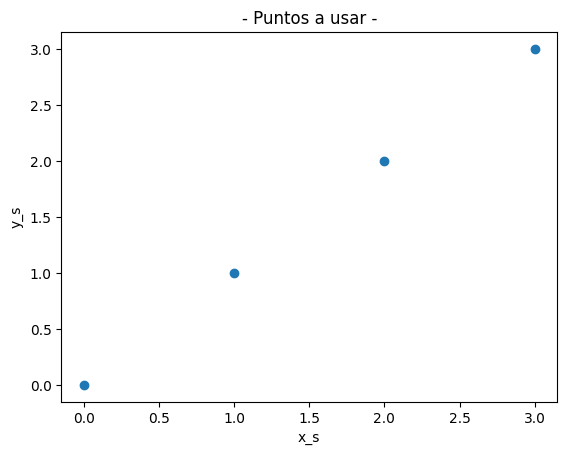

In [13]:
import matplotlib.pyplot as plt

plt.scatter(x_s,y_s)
plt.xlabel("x_s")
plt.ylabel("y_s")
plt.title("- Puntos a usar -")
plt.show()

La interpolación de un conjunto de puntos usando polinomios de Lagrange $P(x)$ está dada por la fórmula: 

$$
P(x) = \sum_{k=0}^n f(x_k) L_k(x)
$$

Donde:

$$
L_k(x) = \prod_{\substack{i=0 \\ i \neq k}}^n \frac{x - x_i}{x_k - x_i}
$$

In [5]:
def lagrange_polynomial(x: float, x_points: np.ndarray, y_points: np.ndarray) -> float:
    n = len(x_points)
    result = 0
    for k in range(n):
        L_k = 1
        for i in range(n):
            if i != k:
                L_k *= (x - x_points[i]) / (x_points[k] - x_points[i])
        result += y_points[k] * L_k
    return result

In [6]:
x_values = np.linspace(min(x_s), max(x_s), 500)
y_values = [lagrange_polynomial(x, x_s, y_s) for x in x_values]

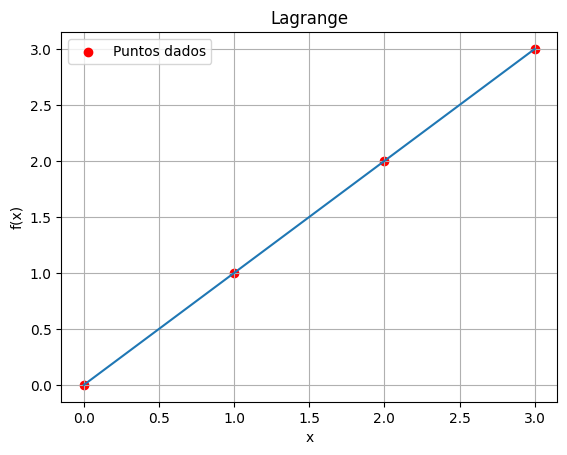

In [9]:
plt.plot(x_values, y_values)
plt.scatter(x_s, y_s, color="red", label="Puntos dados")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Lagrange")
plt.legend()
plt.grid()
plt.show()

**El Polinomio de Lagrange resultante es: $P(x) = x$**

Por lo tanto el polinomio $P(x) = x$ en los puntos:

$P(x = 3.78) = 3.78$

$P(x = 19.102) = 19.102$

## PREGUNTA 7

### Dados los puntos $(-1,1)$, $(1,3)$. Determine el spline cúbico ### 
Teniendo en cuenta que $f'(x_0) = 1, f'(x_n) = 2$

Se procede a obtener las ecuaciones:

$S_0(x_0) = y_0$

$S_0(x_1) = y_1$

$S_0'(x_0) = 1$

$S_1'(x_1) = 2$



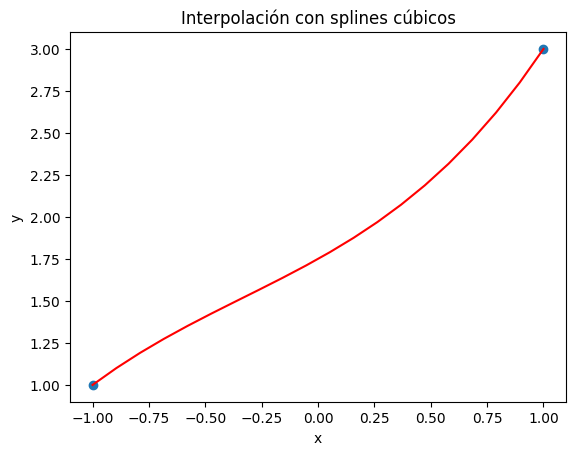

In [8]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 1]
ys = [1, 3]
s = [
    {"a": 1, "b": 1, "c": -1/2, "d": 1/4}
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

Los coeficientes del $S_0$ son:

$a_0 = 1$

$b_0 = 1$

$c_0 = -\frac{1}{2}$

$d_0 = \frac{1}{4}$

**La expresión del spline $S_0$ es:**
$$S_0 = 1 + (x + 1) - \frac{1}{2} (x+1)^2 + \frac{1}{4} (x+1)^3$$

## PREGUNTA 8

### Dados los puntos (-1,1), (0,5), (1,3), se ha obtenido los splines cúbicos correspondientes. 

Sin embargo, al observar la figura, usted no se siente satisfecho con la pendiente resultante en el punto $(x_1, y_1)$. Y decide intentar una modificación a las ecuaciones, tal que los splines sean tangentes a una pendiente deseada $m$ en el punto $(x_1,y_1)$

In [1]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

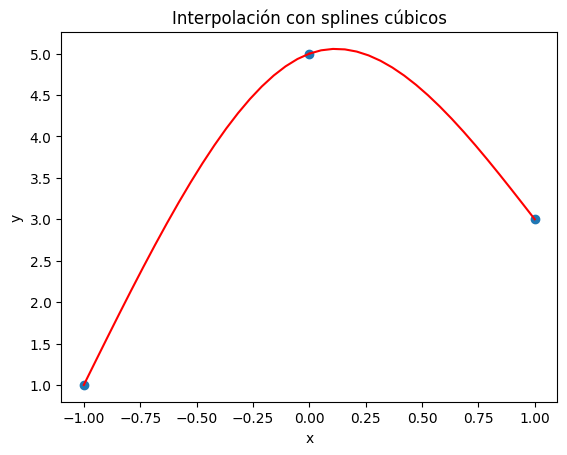

In [2]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

**La ecuación que se debe modificar para poder cumplir con el requisito de $m$ es:**

$$S_0''(x_1) = S_1''(x_1)$$

Dadas las ecuaciones de los splines $S_0$ y $S_1$

$$S_0 = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3$$
$$S_1 = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$$

Se procede a obtener las ecuaciones:

$S_0(x_0) = y_0$

$S_0(x_1) = y_1$

$S_1(x_1) = y_1$

$S_1(x_2) = y_2$

$S_0'(x_1) = S_1'(x_1)$

$S_0''(x_0) = 0$

$S_1''(x_2) = 0$

$S_0''(x_1) = S_1''(x_1) = -2$

Se obtienen los coeficientes para los splines:

$a_0 = 1$

$b_0 = 7$

$c_0 = 0$

$d_0 = -3$

$a_1 = 5$

$b_1 = -2$

$c_1 = 0$

$d_1 = 0$

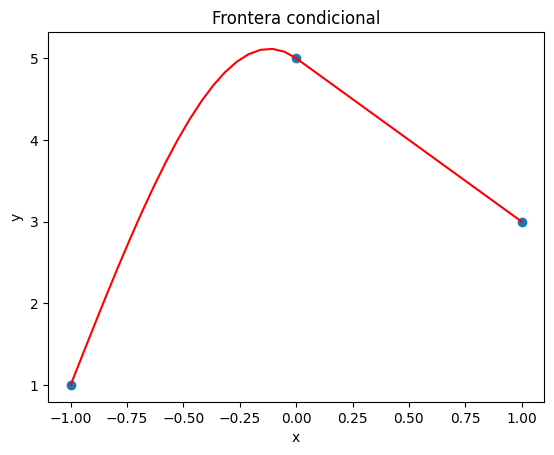

In [10]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 7, "c": 0, "d": -3},
    {"a": 5, "b": -2, "c": 0, "d": 0},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Frontera condicional")
plt.show()

**La expresión del spline $S_0$ y $sS_1$ es:**
$$S_0 = 1 + 7 (x + 1) -3 (x + 1)^3$$
$$S_1 = 5 - 2 (x + 5)$$